In [1]:
import csv 
import pandas as pd 
from sklearn.model_selection import train_test_split
from tpot import TPOTClassifier
from sklearn.preprocessing import LabelEncoder
import numpy as np
import seaborn as sn 
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

C:\Users\Dell-pc\Anaconda3\lib\site-packages\deap\tools\_hypervolume\pyhv.py:33: ImportWarning: Falling back to the python version of hypervolume module. Expect this to be very slow.
  "module. Expect this to be very slow.", ImportWarning)
C:\Users\Dell-pc\Anaconda3\lib\importlib\_bootstrap.py:219: ImportWarning: can't resolve package from __spec__ or __package__, falling back on __name__ and __path__
  return f(*args, **kwds)
C:\Users\Dell-pc\Anaconda3\lib\importlib\_bootstrap.py:219: ImportWarning: can't resolve package from __spec__ or __package__, falling back on __name__ and __path__
  return f(*args, **kwds)


In [2]:
google = []
with open('google_tesla.csv') as f :
    reader = csv.reader(f)
    for rows in reader:
        google.append(rows)

google = google[1:]
google = pd.DataFrame(google,columns=['id','google score'])

google_ml = google[['google score']]

google_ml.head(5)

,google score
0,0.0
1,0.20000000298023224
2,0.10000000149011612
3,0.0
4,0.10000000149011612


In [3]:
aws = []
with open('aws_tesla.csv') as f :
    reader = csv.reader(f)
    for rows in reader:
        aws.append(rows)

aws = aws[1:]
aws = pd.DataFrame(aws,columns=['id','aws_score',])

aws_ml = aws[['aws_score']]

aws_ml.head(5)

,aws_score
0,3.43361134
1,0.76289069
2,0.80252462
3,0.63196903
4,0.90996217


In [4]:
watson = []
with open('watson_tesla.csv') as f :
    reader = csv.reader(f)
    for rows in reader:
        watson.append(rows)

watson = watson[1:]
watson = pd.DataFrame(watson,columns=['id','watson_score'])

watson_ml = watson[['watson_score']]

watson_ml.head(5)

,watson_score
0,0.0
1,0.74
2,0.0
3,0.75
4,-0.7


In [5]:
azure = []
with open('azure_tesla.csv') as f :
    reader = csv.reader(f)
    for rows in reader:
        azure.append(rows)

azure = azure[1:]
azure = pd.DataFrame(azure,columns=['id','azure score'])

azure_ml = azure[['azure score']]

azure_ml.head(5)

,azure score
0,0.5
1,0.837
2,0.5
3,0.958
4,0.5


In [18]:
manual = []
with open('manual_tesla.csv') as f :
    reader = csv.reader(f)
    for rows in reader:
        manual.append(rows)

manual = manual[1:]
manual = pd.DataFrame(manual,columns=['id','manual_sentiment'])

manual_ml = manual[['manual_sentiment']]
#manual_ml = manual_ml.replace('0','0.5')
#manual_ml = manual_ml.replace('-1','0')
manual_ml.head(5)

,manual_sentiment
0,0
1,1
2,1
3,1
4,0


### TPOT 

In [19]:
d = google_ml.join(aws_ml)
d = d.join(azure_ml)
d = d.join(watson_ml)

In [20]:
lbl = LabelEncoder()
q = lbl.fit_transform(manual_ml)
d = pd.get_dummies(d).values

C:\Users\Dell-pc\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [21]:
X_train, X_test, y_train, y_test = train_test_split(d,q,test_size=0.2)

In [22]:
tpot = TPOTClassifier(verbosity=3, 
                      scoring="accuracy"
                      )

tpot.fit(X_train,y_train)

C:\Users\Dell-pc\Anaconda3\lib\importlib\_bootstrap.py:219: ImportWarning: can't resolve package from __spec__ or __package__, falling back on __name__ and __path__
  return f(*args, **kwds)
C:\Users\Dell-pc\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


29 operators have been imported by TPOT.


A Jupyter Widget

_pre_test decorator: _random_mutation_operator: num_test=0 Input X must be non-negative
_pre_test decorator: _random_mutation_operator: num_test=0 X contains negative values.
_pre_test decorator: _random_mutation_operator: num_test=0 array must not contain infs or NaNs
_pre_test decorator: _random_mutation_operator: num_test=0 Unsupported set of arguments: The combination of penalty='l2' and loss='hinge' are not supported when dual=False, Parameters: penalty='l2', loss='hinge', dual=False
_pre_test decorator: _random_mutation_operator: num_test=0 Input X must be non-negative
_pre_test decorator: _random_mutation_operator: num_test=1 Unsupported set of arguments: The combination of penalty='l1' and loss='hinge' is not supported, Parameters: penalty='l1', loss='hinge', dual=False
_pre_test decorator: _random_mutation_operator: num_test=0 Input X must be non-negative
_pre_test decorator: _random_mutation_operator: num_test=0 Unsupported set of arguments: The combination of penalty='l1' an

_pre_test decorator: _random_mutation_operator: num_test=0 Unsupported set of arguments: The combination of penalty='l1' and loss='logistic_regression' are not supported when dual=True, Parameters: penalty='l1', loss='logistic_regression', dual=True
_pre_test decorator: _random_mutation_operator: num_test=0 Input X must be non-negative
_pre_test decorator: _random_mutation_operator: num_test=1 Input X must be non-negative
_pre_test decorator: _random_mutation_operator: num_test=0 Found array with 0 feature(s) (shape=(50, 0)) while a minimum of 1 is required.
_pre_test decorator: _random_mutation_operator: num_test=0 Found array with 0 feature(s) (shape=(50, 0)) while a minimum of 1 is required.
Pipeline encountered that has previously been evaluated during the optimization process. Using the score from the previous evaluation.
Generation 4 - Current Pareto front scores:
-1	0.6212972085385878	RandomForestClassifier(input_matrix, RandomForestClassifier__bootstrap=True, RandomForestClassi

-2	0.6429556650246304	DecisionTreeClassifier(ExtraTreesClassifier(input_matrix, ExtraTreesClassifier__bootstrap=False, ExtraTreesClassifier__criterion=gini, ExtraTreesClassifier__max_features=0.45, ExtraTreesClassifier__min_samples_leaf=14, ExtraTreesClassifier__min_samples_split=5, ExtraTreesClassifier__n_estimators=100), DecisionTreeClassifier__criterion=gini, DecisionTreeClassifier__max_depth=3, DecisionTreeClassifier__min_samples_leaf=13, DecisionTreeClassifier__min_samples_split=15)

_pre_test decorator: _random_mutation_operator: num_test=0 Expected n_neighbors <= n_samples,  but n_samples = 50, n_neighbors = 80
_pre_test decorator: _random_mutation_operator: num_test=1 Unsupported set of arguments: The combination of penalty='l1' and loss='logistic_regression' are not supported when dual=True, Parameters: penalty='l1', loss='logistic_regression', dual=True
_pre_test decorator: _random_mutation_operator: num_test=0 Input X must be non-negative
_pre_test decorator: _random_mutatio

_pre_test decorator: _random_mutation_operator: num_test=1 Unsupported set of arguments: The combination of penalty='l1' and loss='logistic_regression' are not supported when dual=True, Parameters: penalty='l1', loss='logistic_regression', dual=True
_pre_test decorator: _random_mutation_operator: num_test=2 Unsupported set of arguments: The combination of penalty='l1' and loss='logistic_regression' are not supported when dual=True, Parameters: penalty='l1', loss='logistic_regression', dual=True
Generation 12 - Current Pareto front scores:
-1	0.6434482758620689	GradientBoostingClassifier(input_matrix, GradientBoostingClassifier__learning_rate=0.5, GradientBoostingClassifier__max_depth=3, GradientBoostingClassifier__max_features=0.2, GradientBoostingClassifier__min_samples_leaf=10, GradientBoostingClassifier__min_samples_split=3, GradientBoostingClassifier__n_estimators=100, GradientBoostingClassifier__subsample=0.6500000000000001)
-2	0.6496223316912972	RandomForestClassifier(ExtraTreesC

Generation 15 - Current Pareto front scores:
-1	0.6434482758620689	GradientBoostingClassifier(input_matrix, GradientBoostingClassifier__learning_rate=0.5, GradientBoostingClassifier__max_depth=3, GradientBoostingClassifier__max_features=0.2, GradientBoostingClassifier__min_samples_leaf=10, GradientBoostingClassifier__min_samples_split=3, GradientBoostingClassifier__n_estimators=100, GradientBoostingClassifier__subsample=0.6500000000000001)
-2	0.6498522167487684	DecisionTreeClassifier(ExtraTreesClassifier(input_matrix, ExtraTreesClassifier__bootstrap=False, ExtraTreesClassifier__criterion=entropy, ExtraTreesClassifier__max_features=0.6500000000000001, ExtraTreesClassifier__min_samples_leaf=15, ExtraTreesClassifier__min_samples_split=12, ExtraTreesClassifier__n_estimators=100), DecisionTreeClassifier__criterion=gini, DecisionTreeClassifier__max_depth=3, DecisionTreeClassifier__min_samples_leaf=13, DecisionTreeClassifier__min_samples_split=14)
-3	0.6500985221674875	DecisionTreeClassifier(

-1	0.6500985221674875	GradientBoostingClassifier(CombineDFs(input_matrix, input_matrix), GradientBoostingClassifier__learning_rate=0.1, GradientBoostingClassifier__max_depth=6, GradientBoostingClassifier__max_features=0.7500000000000001, GradientBoostingClassifier__min_samples_leaf=10, GradientBoostingClassifier__min_samples_split=7, GradientBoostingClassifier__n_estimators=100, GradientBoostingClassifier__subsample=0.7000000000000001)

_pre_test decorator: _random_mutation_operator: num_test=0 Unsupported set of arguments: The combination of penalty='l1' and loss='hinge' is not supported, Parameters: penalty='l1', loss='hinge', dual=False
_pre_test decorator: _random_mutation_operator: num_test=0 Found array with 0 feature(s) (shape=(50, 0)) while a minimum of 1 is required.
_pre_test decorator: _random_mutation_operator: num_test=0 Found array with 0 feature(s) (shape=(50, 0)) while a minimum of 1 is required.
_pre_test decorator: _random_mutation_operator: num_test=0 Input X must be

TPOTClassifier(config_dict=None, crossover_rate=0.1, cv=5,
        disable_update_check=False, early_stop=None, generations=100,
        max_eval_time_mins=5, max_time_mins=None, memory=None,
        mutation_rate=0.9, n_jobs=1, offspring_size=None,
        periodic_checkpoint_folder=None, population_size=100,
        random_state=None, scoring='accuracy', subsample=1.0,
        use_dask=False, verbosity=3, warm_start=False)

In [23]:
tpot.score(X_test,y_test)

0.3888888888888889

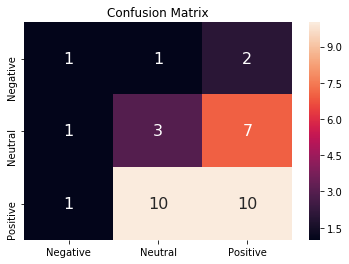

In [24]:
predict = tpot.predict(X_test)
cm = confusion_matrix(y_test,predict)
ax = plt.subplot()
ax.set_xlabel('Predicted Sentiments')
ax.set_ylabel('Manual Sentiments')
ax.set_title('Confusion Matrix')
sn.heatmap(cm, annot=True,annot_kws={"size": 16})# font size
ax.xaxis.set_ticklabels(['Negative','Neutral','Positive'])
ax.yaxis.set_ticklabels(['Negative','Neutral','Positive'])
plt.show()

### TEST PREDICTION ANALYSIS :
#### 1 out of 4 Negative labels were predicted correctly ; 3 out of 11 Neutral labels are predicted correctly ;10 out of 21 Positive labels are predicted correctly. 

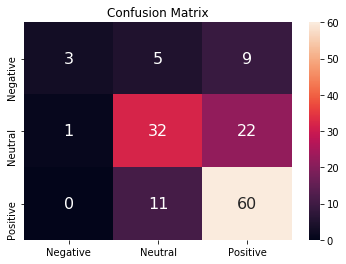

In [25]:
predict_train = tpot.predict(X_train)
cm_train = confusion_matrix(y_train,predict_train)
ax = plt.subplot()
ax.set_xlabel('Predicted Sentiments')
ax.set_ylabel('Manual Sentiments')
ax.set_title('Confusion Matrix')
sn.heatmap(cm_train, annot=True,annot_kws={"size": 16})# font size
ax.xaxis.set_ticklabels(['Negative','Neutral','Positive'])
ax.yaxis.set_ticklabels(['Negative','Neutral','Positive'])
plt.show()

### TRAIN PREDICTION ANALYSIS :
#### 3 out of 17 Negative labels were predicted correctly ; 32 out of 55 Neutral labels are predicted correctly ; 60 out of 71 Positive labels are predicted correctly.

### TPOT FINAL PREDICTION ANALYSIS :
#### Negative  - 4 out of 21 ; Neutral - 35 out of 66 ; Positive -70 out of 81 correctly predicted labels